In [89]:
%pip install mlflow

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [90]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# configuration
sns.set_theme(style="white", palette="deep")

In [92]:
df_students = pd.read_csv("../datasets/StudentPerformanceFactors.csv")
df_students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [93]:
df_students.columns = df_students.columns.str.lower()
df_students.columns.to_list()

['hours_studied',
 'attendance',
 'parental_involvement',
 'access_to_resources',
 'extracurricular_activities',
 'sleep_hours',
 'previous_scores',
 'motivation_level',
 'internet_access',
 'tutoring_sessions',
 'family_income',
 'teacher_quality',
 'school_type',
 'peer_influence',
 'physical_activity',
 'learning_disabilities',
 'parental_education_level',
 'distance_from_home',
 'gender',
 'exam_score']

In [94]:
df_students.isnull().sum()
df_students.dropna(inplace=True)
df_students.isnull().sum()

hours_studied                 0
attendance                    0
parental_involvement          0
access_to_resources           0
extracurricular_activities    0
sleep_hours                   0
previous_scores               0
motivation_level              0
internet_access               0
tutoring_sessions             0
family_income                 0
teacher_quality               0
school_type                   0
peer_influence                0
physical_activity             0
learning_disabilities         0
parental_education_level      0
distance_from_home            0
gender                        0
exam_score                    0
dtype: int64

In [95]:
df_students.drop_duplicates(inplace=True)

In [96]:
df_students.loc[df_students["exam_score"] > 100, "exam_score"] = 100
df_students['status'] = np.where(df_students['exam_score'] >= 70, 'Pass', 'Fail')

In [97]:
columns = df_students.dtypes[df_students.dtypes == "object"].to_dict().keys()

for column in columns:
    df_students[column] = df_students[column].astype("category")

df_students.dtypes

hours_studied                    int64
attendance                       int64
parental_involvement          category
access_to_resources           category
extracurricular_activities    category
sleep_hours                      int64
previous_scores                  int64
motivation_level              category
internet_access               category
tutoring_sessions                int64
family_income                 category
teacher_quality               category
school_type                   category
peer_influence                category
physical_activity                int64
learning_disabilities         category
parental_education_level      category
distance_from_home            category
gender                        category
exam_score                       int64
status                        category
dtype: object

### Analyze exploration data

C:\Users\diogenes monegro\AppData\Local\Temp\ipykernel_21560\711894587.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_school_type = df_students.groupby("school_type").size().reset_index(name="count")


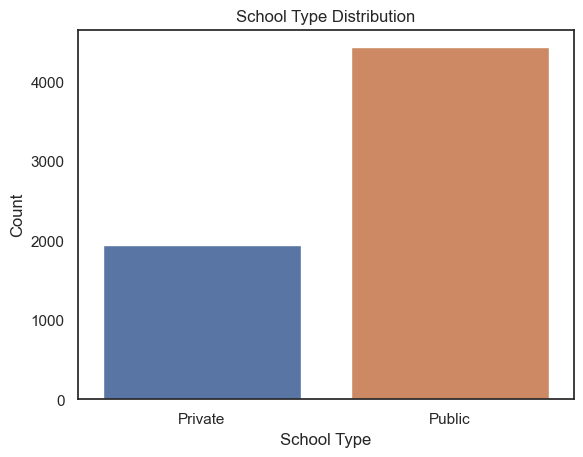

In [98]:
df_school_type = df_students.groupby("school_type").size().reset_index(name="count")

sns.barplot(x="school_type", y="count", hue="school_type", data=df_school_type)
plt.xlabel("School Type")
plt.ylabel("Count")
plt.title("School Type Distribution")
plt.show()

C:\Users\diogenes monegro\AppData\Local\Temp\ipykernel_21560\2961247904.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_family_income = df_students.groupby("family_income").size().reset_index(name="count")


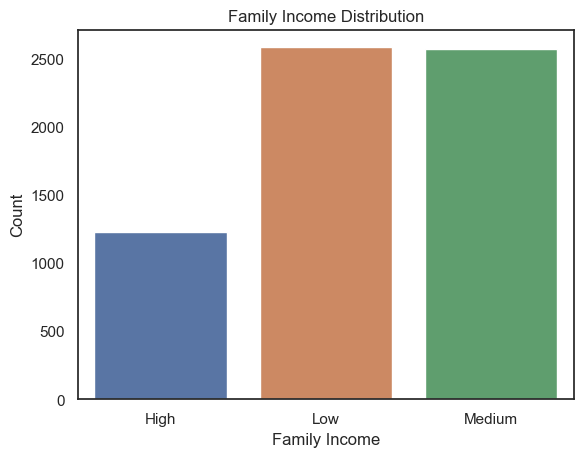

In [99]:
df_family_income = df_students.groupby("family_income").size().reset_index(name="count")

sns.barplot(x="family_income", y="count", hue="family_income", data=df_family_income)
plt.xlabel("Family Income")
plt.ylabel("Count")
plt.title("Family Income Distribution")
plt.show()

C:\Users\diogenes monegro\AppData\Local\Temp\ipykernel_21560\1840273385.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_students.groupby("teacher_quality").size().reset_index(name="count")


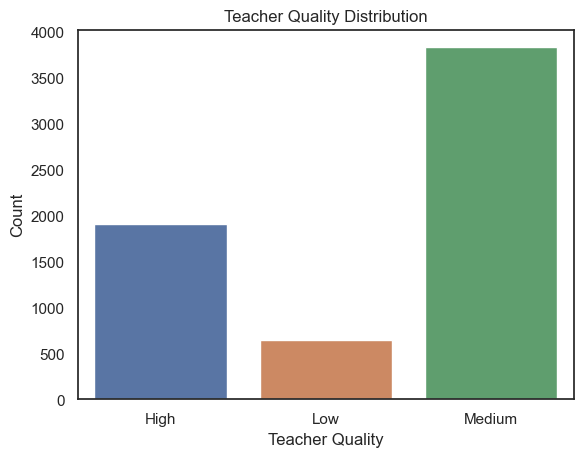

In [100]:
df_teacher_quality = (
    df_students.groupby("teacher_quality").size().reset_index(name="count")
)

sns.barplot(
    x="teacher_quality", y="count", hue="teacher_quality", data=df_teacher_quality
)
plt.xlabel("Teacher Quality")
plt.ylabel("Count")
plt.title("Teacher Quality Distribution")
plt.show()

C:\Users\diogenes monegro\AppData\Local\Temp\ipykernel_21560\2515162470.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_motivation = df_students.groupby("motivation_level").size().reset_index(name="count")


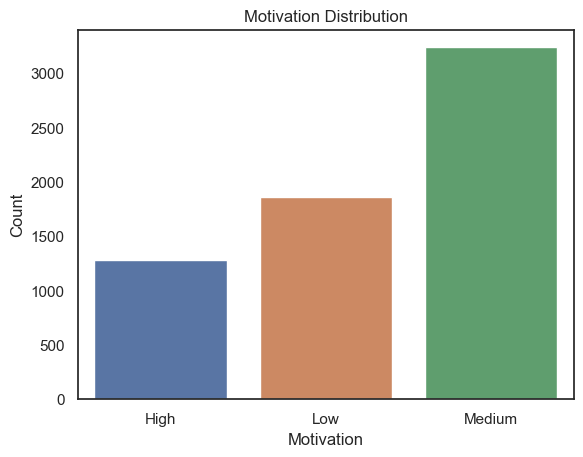

In [101]:
df_motivation = df_students.groupby("motivation_level").size().reset_index(name="count")

sns.barplot(x="motivation_level", y="count", hue="motivation_level", data=df_motivation)
plt.xlabel("Motivation")
plt.ylabel("Count")
plt.title("Motivation Distribution")
plt.show()

In [102]:
columns = ["school_type", "family_income", "teacher_quality", "motivation_level"]